### NS 248 Problem Set 2 – Hypothesis Testing



1\. Write a function that generates a gaussian distribution given three
inputs: 1) the x coordinates for the points to be returned, 2) the mean
and 3) the standard deviation.

e.g. f = gaussian(xvals, mean, stdev)

Use this function to generate a gaussian from -6 to 6 with 10000 points,
a mean of 0 and a standard deviation of 1. Plot the CDF of this
distribution and use the CDF to estimate the probability that a random
draw from this gaussian distribution would be

a\. 1 standard deviation or more from the mean.

b\. 2 standard deviations or more from the mean.

c\. 3 standard deviations or more from the mean.

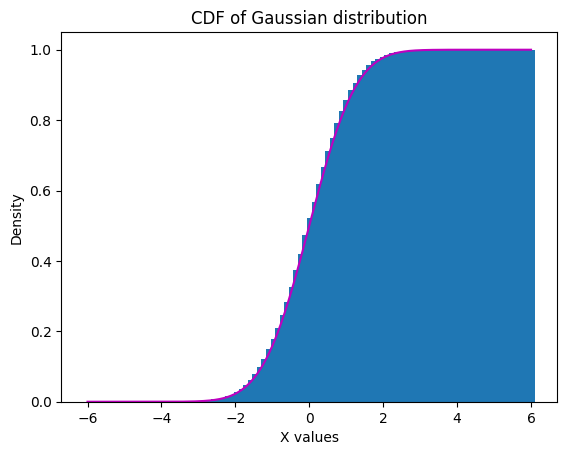

probability of 1  or more stdev's from the mean:  0.31700000000000006
probability of 2  or more stdev's from the mean:  0.04350000000000002
probability of 3  or more stdev's from the mean:  0.0032999999999999458


In [23]:
#gaussian function

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def gaussian(xstart,xend,mean,stdev, simulated_pts, stdev_prob):
    
    x_values = np.linspace(xstart,xend, simulated_pts)
    bin_edges = np.linspace(x_values[0]-.1, x_values[-1]+.1, 100)

    simulated_values = norm.rvs(loc=mean, scale=stdev ,size=simulated_pts)
    
    cdf = norm.cdf(x_values, loc=mean, scale=stdev)
    fig, ax2 = plt.subplots()             
    ax2.hist(simulated_values, cumulative = True, density=True, bins=bin_edges)
    ax2.plot(x_values, cdf, color='m')
    ax2.set_title('CDF of Gaussian distribution')
    ax2.set_ylabel('Density')
    ax2.set_xlabel('X values')
    plt.show()

    for stdev_prob in stdev_prob:
        stdev_pos = mean + stdev_prob
        stdev_neg = mean - stdev_prob
        sorted_empirical_cdf = np.sort(simulated_values)
        stdev_pos_value = np.searchsorted(sorted_empirical_cdf,stdev_pos, side = 'right')/simulated_pts
        stdev_neg_value = np.searchsorted(sorted_empirical_cdf,stdev_neg, side = 'right')/simulated_pts
        right_tail_prob = 1- stdev_pos_value
        left_tail_prob = stdev_neg_value 
        total_prob = right_tail_prob + left_tail_prob
        print ("probability of", stdev_prob," or more stdev's from the mean: " ,total_prob)

stdev_probs_stds = [1,2,3]
# distribution and one or more standard deviation or more from mean
gaussian(-6,6,0,1,10000, stdev_probs_stds)

# distribution and two or more standard deviation or more from mean
#gaussian(-6,6,0,1,10000, 2)

# distribution and three or more standard deviation or more from mean
#gaussian(-6,6,0,1,10000, 3)


2\. Generate 1000 random draws from the gaussian distribution you
generated in question 2 using its CDF and uniform random numbers between
0 and 1. Verify the answers to 2a, b and c. Suggestion: Write a general
purpose random draw function that takes as its input a CDF and the
number of points to draw.

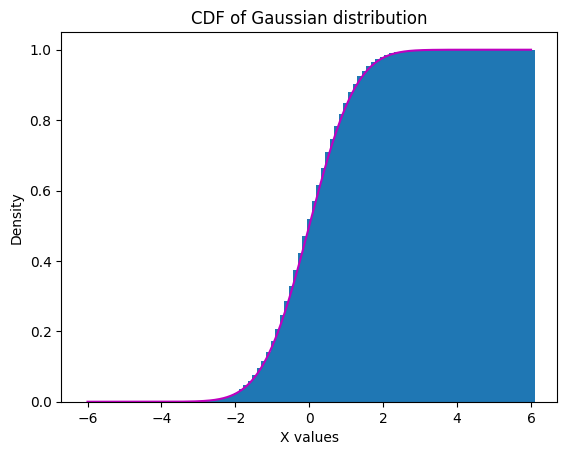

probability of 1  or more stdev's from the mean:  0.31300000000000006
probability of 2  or more stdev's from the mean:  0.0416
probability of 3  or more stdev's from the mean:  0.002299999999999979


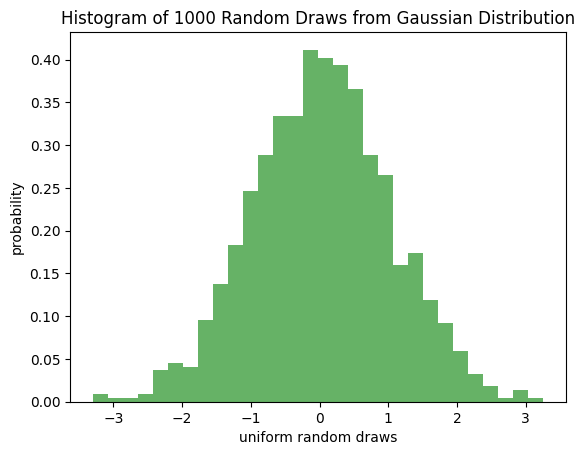

Prob 1 or more stdev from the mean: 0.323
Prob 2 or more stdev from the mean: 0.05
Prob 3 or more stdev from the mean: 0.003


In [26]:
#code here
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt

stdev_probs_stds = [1,2,3]

def gaussian_2(xstart,xend,mean,stdev, simulated_pts, stdev_prob, number_draws):
    
    x_values = np.linspace(xstart,xend, simulated_pts)
    bin_edges = np.linspace(x_values[0]-.1, x_values[-1]+.1, 100)

    simulated_values = norm.rvs(loc=mean, scale=stdev ,size=simulated_pts)
    
    cdf = norm.cdf(x_values, loc=mean, scale=stdev)
    fig, ax2 = plt.subplots()             
    ax2.hist(simulated_values, cumulative = True, density=True, bins=bin_edges)
    ax2.plot(x_values, cdf, color='m')
    ax2.set_title('CDF of Gaussian distribution')
    ax2.set_ylabel('Density')
    ax2.set_xlabel('X values')
    plt.show()

    for stdev_prob in stdev_prob:
        stdev_pos = mean + stdev_prob
        stdev_neg = mean - stdev_prob
        sorted_empirical_cdf = np.sort(simulated_values)
        stdev_pos_value = np.searchsorted(sorted_empirical_cdf,stdev_pos, side = 'right')/simulated_pts
        stdev_neg_value = np.searchsorted(sorted_empirical_cdf,stdev_neg, side = 'right')/simulated_pts
        right_tail_prob = 1- stdev_pos_value
        left_tail_prob = stdev_neg_value 
        total_prob = right_tail_prob + left_tail_prob
        print ("probability of", stdev_prob," or more stdev's from the mean: " ,total_prob)

    simulated_values_uniform_the_draws = uniform.rvs(loc=0, scale=1 ,size=number_draws)
    inverse = norm.ppf(simulated_values_uniform_the_draws, loc=mean, scale=stdev)
    
    fig, ax = plt.subplots()
    ax.hist(inverse, bins=30, density=True, alpha=0.6, color='g', label="Random Draws")
    ax.set_title('Histogram of 1000 Random Draws from Gaussian Distribution')
    ax.set_xlabel('uniform random draws')
    ax.set_ylabel('probability')
    plt.show()

    stdev_1_prob = np.mean(np.abs(inverse - mean) >= stdev)
    stdev_2_prob = np.mean(np.abs(inverse - mean) >= 2 * stdev)
    stdev_3_prob = np.mean(np.abs(inverse - mean) >= 3 * stdev)

    print(f"Prob 1 or more stdev from the mean: {stdev_1_prob}")
    print(f"Prob 2 or more stdev from the mean: {stdev_2_prob}")
    print(f"Prob 3 or more stdev from the mean: {stdev_3_prob}")


gaussian_2 (-6,6,0,1,10000, stdev_probs_stds, 1000)
    

3\. Suppose you are performing a behavioral experiment where you measure
the amount of time it takes for two groups of mice (wild-type and
knockout) to find the hidden platform in a Morris Water Maze. Assume
that you have 10 mice in each group and that after learning the escape
latency is distributed as a gaussian.

a\. If the actual standard deviations are 10 seconds for both groups, the actual mean time for group 1 is 20 seconds and the actual mean time for group 2 is 30 seconds, what is the probability that you will detect the difference between the groups? The easiest way to do this is to simulate the data and see how often the differences come out significant.

Estimated power: 0.500


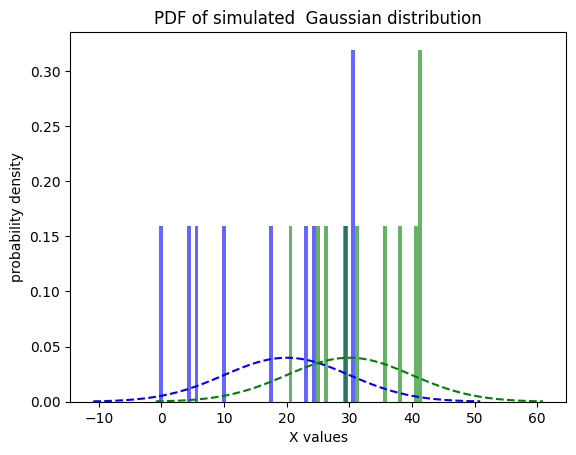

In [47]:
#code here
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind

#means of each group
means_test = [20,30]
colors = ['b', 'g']

def morris_maze_gaussian_simulation (xstart,xend,means, stdev, simulated_pts, alpha):
        fig, ax = plt.subplots()

        p_values = [ ] 
        power = 0
        for _ in range(simulated_pts):
                group1_values = norm.rvs(loc=means[0], scale=stdev, size=simulated_pts)
                group2_values = norm.rvs(loc=means[1], scale=stdev, size=simulated_pts)
        
                t_stat, p_value = ttest_ind(group1_values, group2_values)
                p_values.append(p_value)
                if p_value < alpha:
                        power += 1
                
        power /= simulated_pts
        print(f"Estimated power: {power:.3f}")

        for i,mean in enumerate(means):
                x_values = np.linspace(norm.ppf(xstart, loc=mean, scale=stdev),
                        norm.ppf(xend, loc=mean, scale=stdev), 100)
                bin_edges = np.linspace(x_values[0]-.1, x_values[-1]+.1, 100)
                simulated_values = norm.rvs(loc=mean, scale=stdev ,size=simulated_pts)

                
                pdf_values= norm.pdf(x_values, loc=mean, scale=stdev)            
                ax.hist(simulated_values, density = True, bins=bin_edges, alpha = .6, label=f'Mean = {mean} (Data)', color=colors[i])
                ax.plot(x_values, pdf_values, label=f'Mean = {mean} (PDF)', linestyle='--', color=colors[i])
                ax.set_title('PDF of simulated  Gaussian distribution')
                ax.set_ylabel('probability density')
                ax.set_xlabel('X values')
              

morris_maze_gaussian_simulation(.001, .999, means_test, 10,10, .05)

# from my simulation i get that the differences are detectable 50% of the time (50% powered experiment)

b\. Suppose that the two populations are actually identical, and that both have a mean time of 25 seconds and a standard deviation of 10.
Simulate the experiment 1000 times (e.g. do random draws to get a set of times for each group) and determine how often a two sample t-test returns a significance result at the default significance level. How is that number of incorrect outcomes related to the significance level?


Estimated power: 0.056


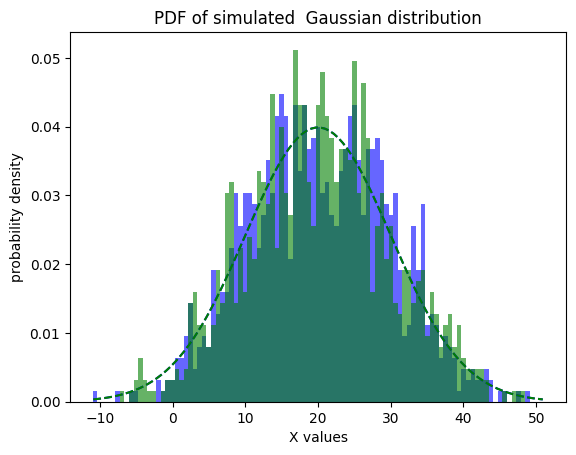

In [1]:
#code here
#code here
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind

#means of each group
means_test = [20,20]
colors = ['b', 'g']
alpha_testvalue =.05

def morris_maze_gaussian_simulation (xstart,xend,means, stdev, simulated_pts, alpha):
        fig, ax = plt.subplots()

        p_values = [ ] 
        power = 0
        for _ in range(simulated_pts):
                group1_values = norm.rvs(loc=means[0], scale=stdev, size=simulated_pts)
                group2_values = norm.rvs(loc=means[1], scale=stdev, size=simulated_pts)
        
                t_stat, p_value = ttest_ind(group1_values, group2_values)
                p_values.append(p_value)
                if p_value < alpha:
                        power += 1
                
        power /= simulated_pts
        print(f"Estimated power: {power:.3f}")

        for i,mean in enumerate(means):
                x_values = np.linspace(norm.ppf(xstart, loc=mean, scale=stdev),
                        norm.ppf(xend, loc=mean, scale=stdev), 100)
                bin_edges = np.linspace(x_values[0]-.1, x_values[-1]+.1, 100)
                simulated_values = norm.rvs(loc=mean, scale=stdev ,size=simulated_pts)

                
                pdf_values= norm.pdf(x_values, loc=mean, scale=stdev)            
                ax.hist(simulated_values, density = True, bins=bin_edges, alpha = .6, label=f'Mean = {mean} (Data)', color=colors[i])
                ax.plot(x_values, pdf_values, label=f'Mean = {mean} (PDF)', linestyle='--', color=colors[i])
                ax.set_title('PDF of simulated  Gaussian distribution')
                ax.set_ylabel('probability density')
                ax.set_xlabel('X values')
              

morris_maze_gaussian_simulation(.001, .999, means_test, 10,1000, alpha_testvalue)

# at alpha = .05 for significance, there is a 5% power, and if you increase alpha =.1, the power is ~10%. 
# this trend makes sense because since the groups are the same, there is a very low chance of detecting a (false positive) that the means/groups are different
#  and if you make the test less stringent by increasing alpha you are just detecting more false +'s

c\. Suppose you were testing four pairs of groups (where each pair is
independent and separate from the other pairs) with 10 mice each. What
is the probability that one or more of the four tests would result in
a significant difference at the p \< 0.05 level?

In [3]:
#code here

#assuming just a chance level of significance (that there is no trend):

#prob success = .05 (false positive rate)
#prob failure = .95 

prob_sig_four_pairs = 1 - (.95**4)
print("probabability one or more pairs are significantly different ", prob_sig_four_pairs)



probabability one or more pairs are significantly different  0.18549375000000012
